# 

In [1]:
!pip install openpyxl

In [2]:
!pip install xgboost

In [3]:
!pip install shap

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import numpy as np

In [37]:
data = pd.read_excel('app_data.xlsx')
data

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Severity,Diagnosis_Presumptive,Diagnosis,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
0,12.680000,16.900000,female,148.0,37.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.100000,31.900000,male,147.0,69.5,2.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
2,14.140000,23.300000,female,163.0,62.0,4.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN
3,16.370000,20.600000,female,165.0,56.0,3.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
4,11.080000,16.900000,female,163.0,45.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,12.413415,25.250476,female,166.5,70.0,4.0,primary surgical,uncomplicated,appendicitis,appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
777,17.092402,20.429418,female,158.0,51.0,6.0,secondary surgical,complicated,appendicitis,appendicitis,...,Douglas,NaN,NaN,yes,yes,NaN,NaN,NaN,NaN,NaN
778,14.992471,19.909972,female,152.0,46.0,4.0,primary surgical,uncomplicated,appendicitis,appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unauffällig
779,7.195072,14.295549,male,129.3,23.9,5.0,primary surgical,uncomplicated,appendicitis,appendicitis,...,NaN,no,NaN,yes,NaN,no,NaN,NaN,NaN,NaN


In [38]:
data = data.iloc[:,:39]

In [39]:
print(data.columns)

Index(['Age', 'BMI', 'Sex', 'Height', 'Weight', 'Length_of_Stay', 'Management',
       'Severity', 'Diagnosis_Presumptive', 'Diagnosis', 'Alvarado_Score',
       'Paedriatic_Appendicitis_Score', 'Appendix_on_US', 'Appendix_Diameter',
       'Migratory_Pain', 'Lower_Right_Abd_Pain',
       'Contralateral_Rebound_Tenderness', 'Coughing_Pain', 'Nausea',
       'Loss_of_Appetite', 'Body_Temperature', 'WBC_Count',
       'Neutrophil_Percentage', 'Segmented_Neutrophils', 'Neutrophilia',
       'RBC_Count', 'Hemoglobin', 'RDW', 'Thrombocyte_Count',
       'Ketones_in_Urine', 'RBC_in_Urine', 'WBC_in_Urine', 'CRP', 'Dysuria',
       'Stool', 'Peritonitis', 'Psoas_Sign', 'Ipsilateral_Rebound_Tenderness',
       'US_Performed'],
      dtype='object')


In [40]:
data.isnull().sum()

Age                                   0
BMI                                  26
Sex                                   1
Height                               25
Weight                                2
Length_of_Stay                        3
Management                            0
Severity                              0
Diagnosis_Presumptive                 1
Diagnosis                             1
Alvarado_Score                       51
Paedriatic_Appendicitis_Score        51
Appendix_on_US                        4
Appendix_Diameter                   283
Migratory_Pain                        8
Lower_Right_Abd_Pain                  7
Contralateral_Rebound_Tenderness     14
Coughing_Pain                        15
Nausea                                7
Loss_of_Appetite                      9
Body_Temperature                      6
WBC_Count                             5
Neutrophil_Percentage               102
Segmented_Neutrophils               727
Neutrophilia                         49


In [41]:
data2 = data[['Age','BMI','Sex','Neutrophil_Percentage','WBC_Count','Neutrophilia','Ketones_in_Urine','Peritonitis','Lower_Right_Abd_Pain','Contralateral_Rebound_Tenderness','Ipsilateral_Rebound_Tenderness','Loss_of_Appetite','Body_Temperature','Diagnosis']]

In [42]:
data2.isnull().sum()

Age                                   0
BMI                                  26
Sex                                   1
Neutrophil_Percentage               102
WBC_Count                             5
Neutrophilia                         49
Ketones_in_Urine                    199
Peritonitis                           8
Lower_Right_Abd_Pain                  7
Contralateral_Rebound_Tenderness     14
Ipsilateral_Rebound_Tenderness      162
Loss_of_Appetite                      9
Body_Temperature                      6
Diagnosis                             1
dtype: int64

In [43]:
data2_wo = data2.drop(columns=['Ketones_in_Urine','Ipsilateral_Rebound_Tenderness'])
data2_wo.isnull().sum()

Age                                   0
BMI                                  26
Sex                                   1
Neutrophil_Percentage               102
WBC_Count                             5
Neutrophilia                         49
Peritonitis                           8
Lower_Right_Abd_Pain                  7
Contralateral_Rebound_Tenderness     14
Loss_of_Appetite                      9
Body_Temperature                      6
Diagnosis                             1
dtype: int64

In [44]:
missing_pattern = data2_wo.isnull().any(axis=1)
print(f"A total of {missing_pattern.sum()} patients had at least one record missing")

A total of 132 patients had at least one record missing


In [45]:
data_clean = data2.dropna()
data_clean

,Age,BMI,Sex,Neutrophil_Percentage,WBC_Count,Neutrophilia,Ketones_in_Urine,Peritonitis,Lower_Right_Abd_Pain,Contralateral_Rebound_Tenderness,Ipsilateral_Rebound_Tenderness,Loss_of_Appetite,Body_Temperature,Diagnosis
0,12.680000,16.900000,female,68.2,7.7,no,++,no,yes,yes,no,yes,37.0,appendicitis
1,14.100000,31.900000,male,64.8,8.1,no,no,no,yes,yes,no,yes,36.9,no appendicitis
2,14.140000,23.300000,female,74.8,13.2,no,no,no,yes,yes,no,no,36.6,no appendicitis
3,16.370000,20.600000,female,63.0,11.4,no,no,no,yes,no,no,yes,36.0,no appendicitis
4,11.080000,16.900000,female,44.0,8.1,no,no,no,yes,yes,no,yes,36.9,appendicitis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,7.990000,13.550000,female,57.4,7.0,no,+++,no,yes,yes,no,yes,36.5,appendicitis
767,11.548255,17.529432,female,85.1,12.6,yes,+++,local,yes,yes,no,no,37.8,appendicitis
769,14.603696,29.237804,male,77.9,16.2,yes,+,local,no,yes,yes,no,39.5,appendicitis
778,14.992471,19.909972,female,68.5,14.6,no,no,no,yes,no,no,no,37.3,appendicitis


In [46]:
data_wo_clean = data2_wo.dropna()
data_wo_clean

,Age,BMI,Sex,Neutrophil_Percentage,WBC_Count,Neutrophilia,Peritonitis,Lower_Right_Abd_Pain,Contralateral_Rebound_Tenderness,Loss_of_Appetite,Body_Temperature,Diagnosis
0,12.680000,16.900000,female,68.2,7.7,no,no,yes,yes,yes,37.0,appendicitis
1,14.100000,31.900000,male,64.8,8.1,no,no,yes,yes,yes,36.9,no appendicitis
2,14.140000,23.300000,female,74.8,13.2,no,no,yes,yes,no,36.6,no appendicitis
3,16.370000,20.600000,female,63.0,11.4,no,no,yes,no,yes,36.0,no appendicitis
4,11.080000,16.900000,female,44.0,8.1,no,no,yes,yes,yes,36.9,appendicitis
...,...,...,...,...,...,...,...,...,...,...,...,...
776,12.413415,25.250476,female,76.6,11.4,yes,local,yes,no,yes,39.4,appendicitis
777,17.092402,20.429418,female,89.2,17.4,yes,local,no,no,yes,37.8,appendicitis
778,14.992471,19.909972,female,68.5,14.6,no,no,yes,no,no,37.3,appendicitis
779,7.195072,14.295549,male,77.0,17.8,yes,local,yes,no,no,37.5,appendicitis


In [47]:
ketone_map = {'no':0,'+':1,'++':2,'+++':3}
data_clean.loc[:,['Ketones_in_Urine']] = data_clean['Ketones_in_Urine'].map(ketone_map)
peritonitis_map = {'no':0, 'local':1, 'generalized':2}
data_clean.loc[:,['Peritonitis']] = data_clean['Peritonitis'].map(peritonitis_map)
diag_map = {'appendicitis':1,'no appendicitis':0}
data_clean['Diagnosis'] = data_clean['Diagnosis'].map(diag_map)
data_wo_clean['Diagnosis'] = data_wo_clean['Diagnosis'].map(diag_map)
data_clean

C:\Users\Mahima Batheja\AppData\Local\Temp\ipykernel_3336\2192184889.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Diagnosis'] = data_clean['Diagnosis'].map(diag_map)
C:\Users\Mahima Batheja\AppData\Local\Temp\ipykernel_3336\2192184889.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_wo_clean['Diagnosis'] = data_wo_clean['Diagnosis'].map(diag_map)


,Age,BMI,Sex,Neutrophil_Percentage,WBC_Count,Neutrophilia,Ketones_in_Urine,Peritonitis,Lower_Right_Abd_Pain,Contralateral_Rebound_Tenderness,Ipsilateral_Rebound_Tenderness,Loss_of_Appetite,Body_Temperature,Diagnosis
0,12.680000,16.900000,female,68.2,7.7,no,2,0,yes,yes,no,yes,37.0,1
1,14.100000,31.900000,male,64.8,8.1,no,0,0,yes,yes,no,yes,36.9,0
2,14.140000,23.300000,female,74.8,13.2,no,0,0,yes,yes,no,no,36.6,0
3,16.370000,20.600000,female,63.0,11.4,no,0,0,yes,no,no,yes,36.0,0
4,11.080000,16.900000,female,44.0,8.1,no,0,0,yes,yes,no,yes,36.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,7.990000,13.550000,female,57.4,7.0,no,3,0,yes,yes,no,yes,36.5,1
767,11.548255,17.529432,female,85.1,12.6,yes,3,1,yes,yes,no,no,37.8,1
769,14.603696,29.237804,male,77.9,16.2,yes,1,1,no,yes,yes,no,39.5,1
778,14.992471,19.909972,female,68.5,14.6,no,0,0,yes,no,no,no,37.3,1


In [48]:
print(data_clean['Sex'].unique())
sex_map = {'female':0,'male':1}
data_clean['Sex'] = data_clean['Sex'].map(sex_map)
affirm_map = {'no':0,'yes':1}
cols = ['Neutrophilia','Lower_Right_Abd_Pain','Contralateral_Rebound_Tenderness','Ipsilateral_Rebound_Tenderness','Loss_of_Appetite']
data_clean[cols] = data_clean[cols].applymap(affirm_map.get)
print(data_clean['Sex'].head())
print(data_clean.dtypes)

['female' 'male']
0    0
1    1
2    0
3    0
4    0
Name: Sex, dtype: int64
Age                                 float64
BMI                                 float64
Sex                                   int64
Neutrophil_Percentage               float64
WBC_Count                           float64
Neutrophilia                          int64
Ketones_in_Urine                     object
Peritonitis                          object
Lower_Right_Abd_Pain                  int64
Contralateral_Rebound_Tenderness      int64
Ipsilateral_Rebound_Tenderness        int64
Loss_of_Appetite                      int64
Body_Temperature                    float64
Diagnosis                             int64
dtype: object


C:\Users\Mahima Batheja\AppData\Local\Temp\ipykernel_3336\989774037.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Sex'] = data_clean['Sex'].map(sex_map)
C:\Users\Mahima Batheja\AppData\Local\Temp\ipykernel_3336\989774037.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_clean[cols] = data_clean[cols].applymap(affirm_map.get)
C:\Users\Mahima Batheja\AppData\Local\Temp\ipykernel_3336\989774037.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da

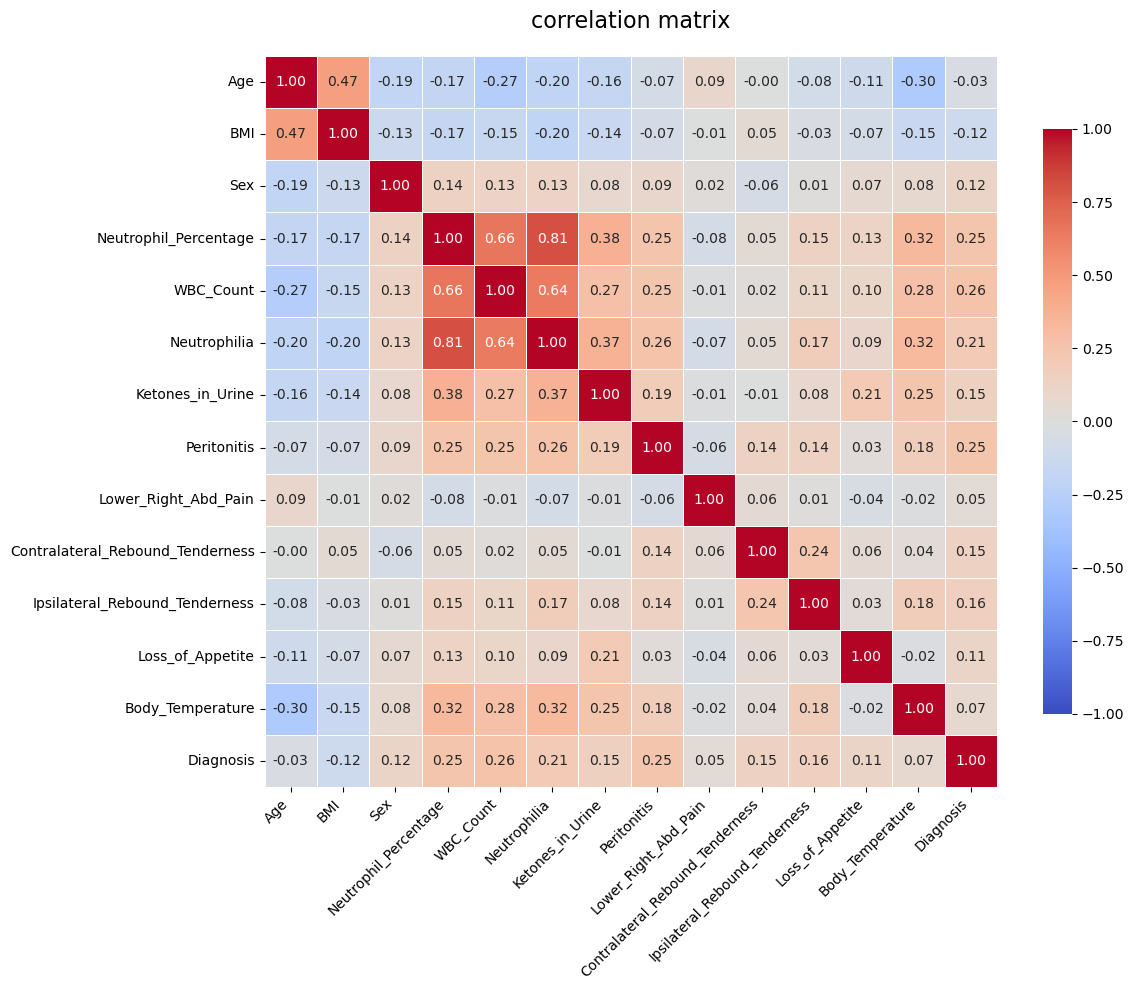

In [49]:
correlation = data_clean.corr()
plt.figure(figsize=(12,10))

heatmap = sns.heatmap(correlation,
                     annot=True,
                     fmt= ".2f",
                     cmap='coolwarm',
                     vmin=-1,
                     vmax=1,
                     center=0,
                     linewidths=.5,
                     cbar_kws={"shrink":0.8})

plt.title('correlation matrix', pad=20, fontsize=16)

heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')

heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
num_feature = ['Age', 'BMI', 'Neutrophil_Percentage',
    'WBC_Count', 'Body_Temperature']
cat_feature = ['Sex', 'Neutrophilia',
    'Peritonitis', 'Lower_Right_Abd_Pain',
    'Contralateral_Rebound_Tenderness',
    'Ipsilateral_Rebound_Tenderness','Ketones_in_Urine', 'Ipsilateral_Rebound_Tenderness',
    'Loss_of_Appetite']
preprocessor = ColumnTransformer([
    ('num',StandardScaler(),num_feature),
    ('cat',OneHotEncoder(drop='first',handle_unknown='ignore'),cat_feature)
],remainder='drop')

In [51]:
data_clean

,Age,BMI,Sex,Neutrophil_Percentage,WBC_Count,Neutrophilia,Ketones_in_Urine,Peritonitis,Lower_Right_Abd_Pain,Contralateral_Rebound_Tenderness,Ipsilateral_Rebound_Tenderness,Loss_of_Appetite,Body_Temperature,Diagnosis
0,12.680000,16.900000,0,68.2,7.7,0,2,0,1,1,0,1,37.0,1
1,14.100000,31.900000,1,64.8,8.1,0,0,0,1,1,0,1,36.9,0
2,14.140000,23.300000,0,74.8,13.2,0,0,0,1,1,0,0,36.6,0
3,16.370000,20.600000,0,63.0,11.4,0,0,0,1,0,0,1,36.0,0
4,11.080000,16.900000,0,44.0,8.1,0,0,0,1,1,0,1,36.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,7.990000,13.550000,0,57.4,7.0,0,3,0,1,1,0,1,36.5,1
767,11.548255,17.529432,0,85.1,12.6,1,3,1,1,1,0,0,37.8,1
769,14.603696,29.237804,1,77.9,16.2,1,1,1,0,1,1,0,39.5,1
778,14.992471,19.909972,0,68.5,14.6,0,0,0,1,0,0,0,37.3,1


In [52]:
X = data_clean.drop(columns='Diagnosis')
y = data_clean['Diagnosis']
X
y = y.astype(int)
y.dtype

dtype('int32')

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
y_train

240    0
392    0
635    1
172    0
327    0
      ..
53     1
113    1
462    0
481    0
279    0
Name: Diagnosis, Length: 334, dtype: int32

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Model: Logistic Regression
Best parameters: {'model__solver': 'liblinear', 'model__penalty': 'l2', 'model__C': 0.1}
Accuracy: 0.6666666666666666
Classification report:
               precision    recall  f1-score   support

           0       0.69      0.72      0.70        46
           1       0.64      0.61      0.62        38

    accuracy                           0.67        84
   macro avg       0.66      0.66      0.66        84
weighted avg       0.67      0.67      0.67        84



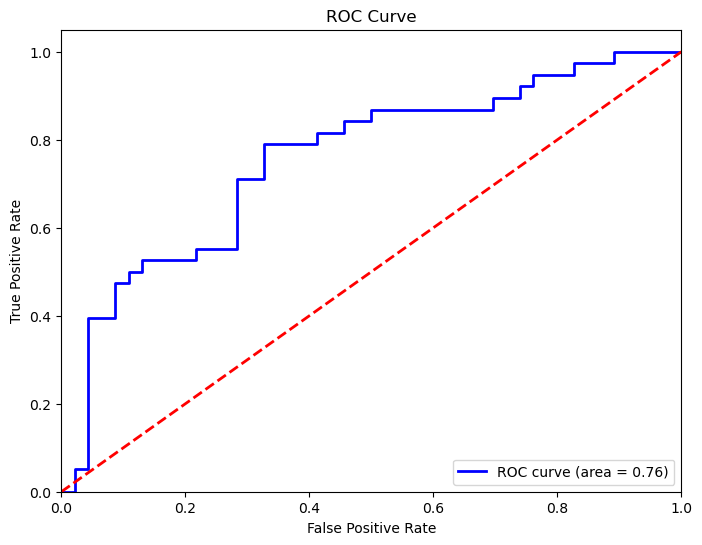

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Model: Random Forest
Best parameters: {'model__n_estimators': 200, 'model__max_depth': 10}
Accuracy: 0.75
Classification report:
               precision    recall  f1-score   support

           0       0.73      0.87      0.79        46
           1       0.79      0.61      0.69        38

    accuracy                           0.75        84
   macro avg       0.76      0.74      0.74        84
weighted avg       0.76      0.75      0.74        84



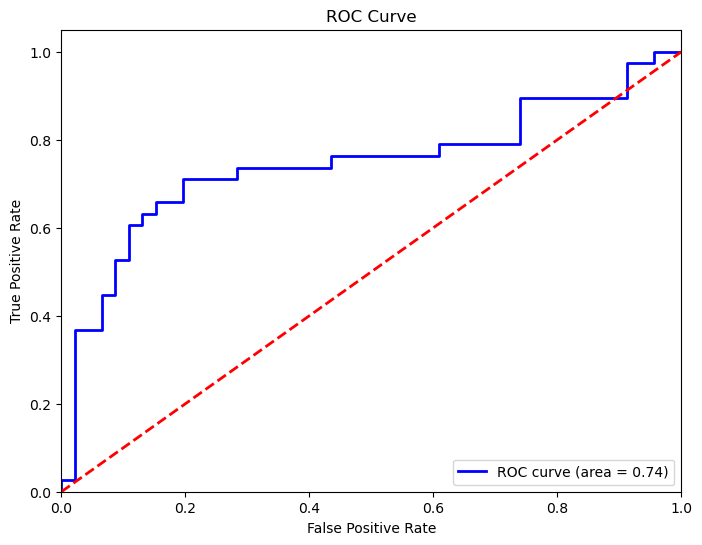

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Model: Gradient Boosting
Best parameters: {'model__n_estimators': 100, 'model__max_depth': 3, 'model__learning_rate': 0.1}
Accuracy: 0.6904761904761905
Classification report:
               precision    recall  f1-score   support

           0       0.69      0.78      0.73        46
           1       0.69      0.58      0.63        38

    accuracy                           0.69        84
   macro avg       0.69      0.68      0.68        84
weighted avg       0.69      0.69      0.69        84



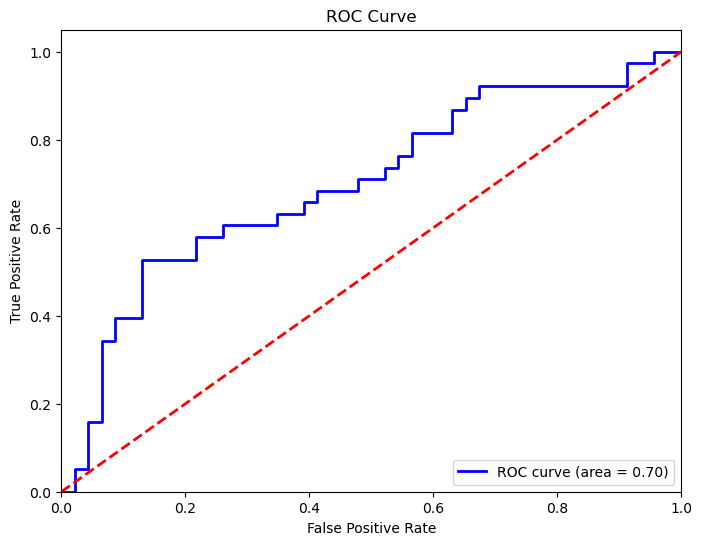

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Model: XGBoost
Best parameters: {'model__max_depth': 5, 'model__learning_rate': 0.01}
Accuracy: 0.6547619047619048
Classification report:
               precision    recall  f1-score   support

           0       0.64      0.83      0.72        46
           1       0.68      0.45      0.54        38

    accuracy                           0.65        84
   macro avg       0.66      0.64      0.63        84
weighted avg       0.66      0.65      0.64        84



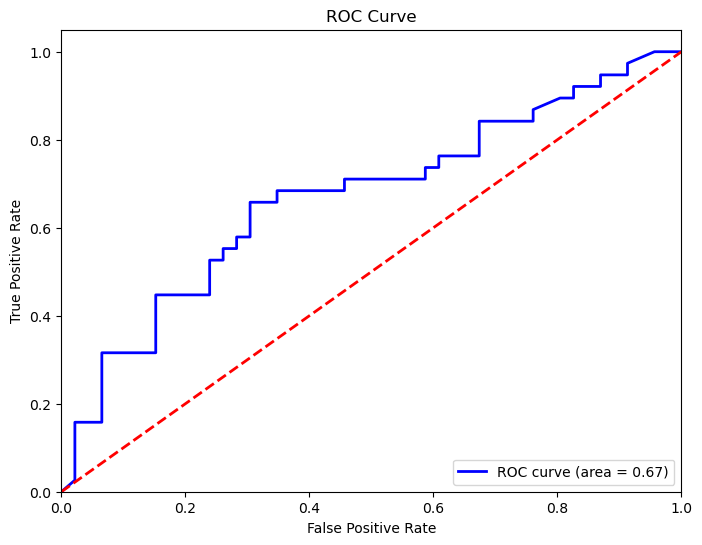

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,classification_report,confusion_matrix
from  matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

models = [
    ("Logistic Regression",LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting",GradientBoostingClassifier()),
    ("XGBoost",XGBClassifier())
]
for name, model in models:
    pipeline = Pipeline([("preprocessor",preprocessor),
                         ("model",model)])
    param_distributions = {}
    if name == "Logistic Regression":
        param_distributions = {
            "model__C":[0.01,0.1,1,10],
            "model__penalty":["l1","l2"],
            "model__solver":["liblinear"]
        }
    elif name == "Random Forest":
        param_distributions = {
            "model__n_estimators":[100,200],
            "model__max_depth":[None, 10,20]
        }
    elif name =="Gradient Boosting":
        param_distributions = {
            "model__n_estimators":[100,200],
            "model__learning_rate":[0.01,0.1],
            "model__max_depth":[3,4,5]
        }
    elif name =="XGBoost":
        param_distributions = {
            "model__max_depth":[3,4,5],
            "model__learning_rate":[0.01,0.1]
        }
    randomized_search = RandomizedSearchCV(
        pipeline,
        param_distributions,
        # n_iter= 20,
        cv=3,
        scoring="roc_auc",
        verbose=3,
        n_jobs=3
    )
    randomized_search.fit(X_train,y_train)
    best_model = randomized_search.best_estimator_
    y_pred = best_model.predict(X_val)
    print("Model:",name)
    print("Best parameters:",randomized_search.best_params_)
    print("Accuracy:",accuracy_score(y_val,y_pred))
    print("Classification report:\n",classification_report(y_val,y_pred))

    if hasattr(best_model.named_steps["model"], "predict_proba"):
        y_pred_proba = best_model.predict_proba(X_val)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
        roc_auc = roc_auc_score(y_val, y_pred_proba)

        plt.figure(figsize=(8, 6))
        plt.plot(
            fpr, tpr, color="blue", lw=2, label="ROC curve (area = %0.2f)" % roc_auc
        )
        plt.plot([0, 1], [0, 1], color="red", lw=2, linestyle="--")
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve")
        plt.legend(loc="lower right")
        plt.show()


In [55]:
X_wo = data_wo_clean.drop(columns='Diagnosis')
y_wo = data_wo_clean['Diagnosis']

y_wo = y_wo.astype(int)
y_wo.dtype
X_wo

,Age,BMI,Sex,Neutrophil_Percentage,WBC_Count,Neutrophilia,Peritonitis,Lower_Right_Abd_Pain,Contralateral_Rebound_Tenderness,Loss_of_Appetite,Body_Temperature
0,12.680000,16.900000,female,68.2,7.7,no,no,yes,yes,yes,37.0
1,14.100000,31.900000,male,64.8,8.1,no,no,yes,yes,yes,36.9
2,14.140000,23.300000,female,74.8,13.2,no,no,yes,yes,no,36.6
3,16.370000,20.600000,female,63.0,11.4,no,no,yes,no,yes,36.0
4,11.080000,16.900000,female,44.0,8.1,no,no,yes,yes,yes,36.9
...,...,...,...,...,...,...,...,...,...,...,...
776,12.413415,25.250476,female,76.6,11.4,yes,local,yes,no,yes,39.4
777,17.092402,20.429418,female,89.2,17.4,yes,local,no,no,yes,37.8
778,14.992471,19.909972,female,68.5,14.6,no,no,yes,no,no,37.3
779,7.195072,14.295549,male,77.0,17.8,yes,local,yes,no,no,37.5


In [56]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
num_feature = ['Age', 'BMI', 'Neutrophil_Percentage',
    'WBC_Count', 'Body_Temperature']
cat_feature = ['Sex', 'Neutrophilia',
    'Peritonitis', 'Lower_Right_Abd_Pain',
    'Contralateral_Rebound_Tenderness',
    'Loss_of_Appetite']
preprocessor = ColumnTransformer([
    ('num',StandardScaler(),num_feature),
    ('cat',OneHotEncoder(drop='first',handle_unknown='ignore'),cat_feature)
],remainder='drop')

In [57]:
from sklearn.model_selection import train_test_split
X_wo_train, X_wo_val, y_wo_train, y_wo_val = train_test_split(X_wo,y_wo,test_size=0.2,random_state=42,stratify=y_wo)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Model: Logistic Regression
Best parameters: {'model__solver': 'liblinear', 'model__penalty': 'l2', 'model__C': 0.1}
Accuracy: 0.7615384615384615
Classification report:
               precision    recall  f1-score   support

           0       0.77      0.61      0.68        54
           1       0.76      0.87      0.81        76

    accuracy                           0.76       130
   macro avg       0.76      0.74      0.75       130
weighted avg       0.76      0.76      0.76       130



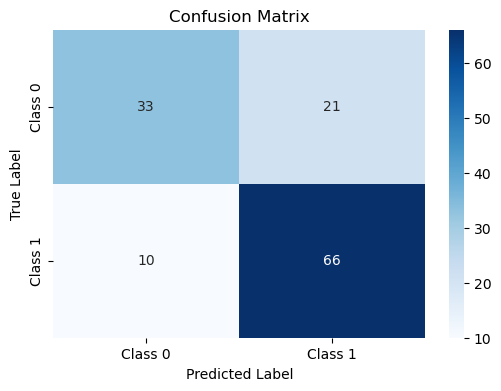

Confusion Matrix:
[[33 21]
 [10 66]]


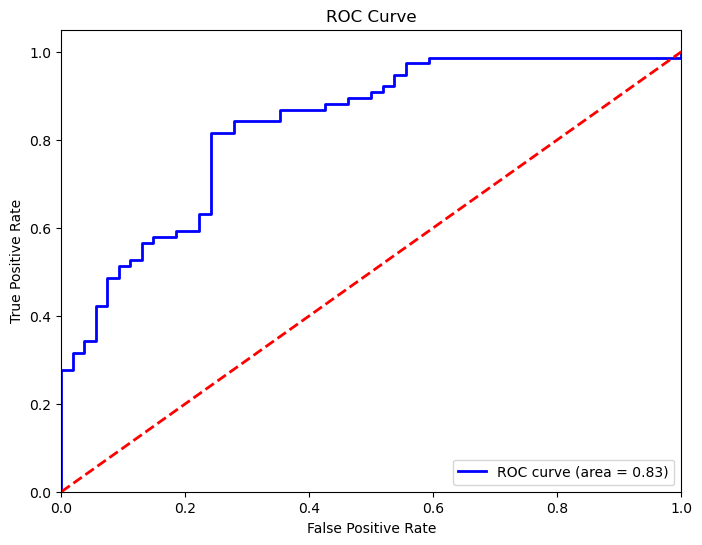

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Model: Random Forest
Best parameters: {'model__n_estimators': 100, 'model__max_depth': 20}
Accuracy: 0.7307692307692307
Classification report:
               precision    recall  f1-score   support

           0       0.69      0.65      0.67        54
           1       0.76      0.79      0.77        76

    accuracy                           0.73       130
   macro avg       0.72      0.72      0.72       130
weighted avg       0.73      0.73      0.73       130



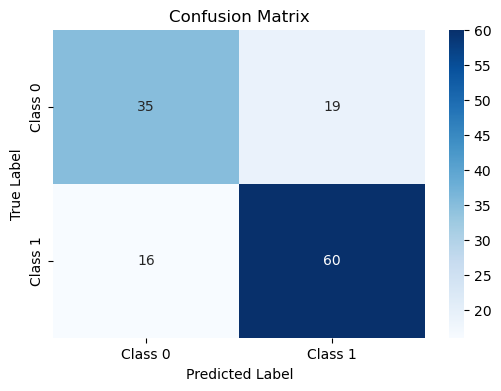

Confusion Matrix:
[[35 19]
 [16 60]]


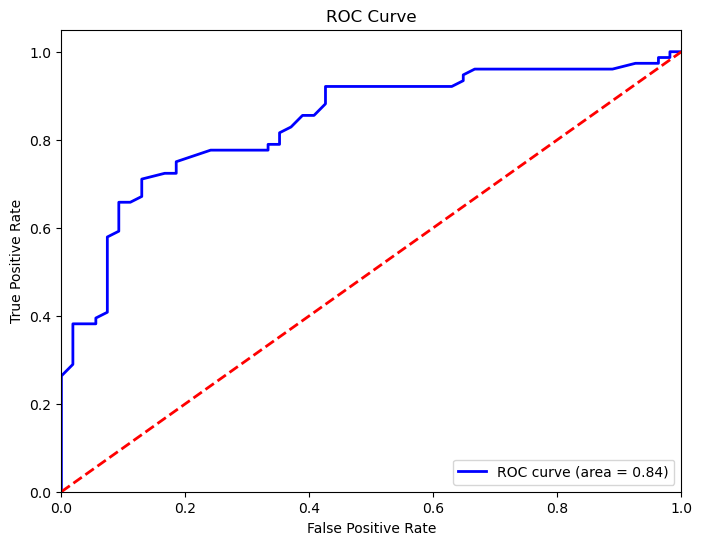

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Model: Gradient Boosting
Best parameters: {'model__n_estimators': 100, 'model__max_depth': 3, 'model__learning_rate': 0.01}
Accuracy: 0.7307692307692307
Classification report:
               precision    recall  f1-score   support

           0       0.68      0.67      0.67        54
           1       0.77      0.78      0.77        76

    accuracy                           0.73       130
   macro avg       0.72      0.72      0.72       130
weighted avg       0.73      0.73      0.73       130



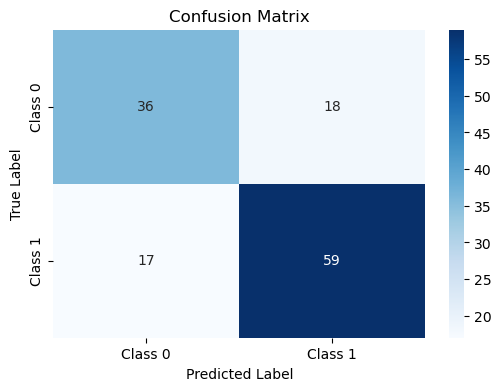

Confusion Matrix:
[[36 18]
 [17 59]]


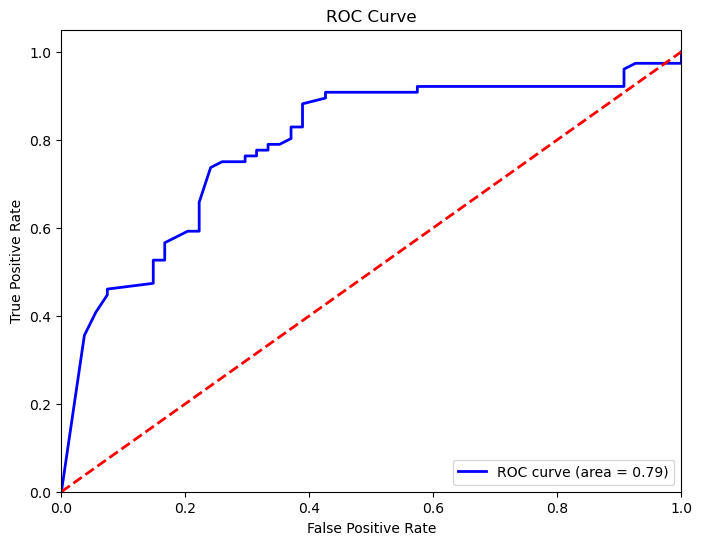

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Model: XGBoost
Best parameters: {'model__max_depth': 3, 'model__learning_rate': 0.01}
Accuracy: 0.7461538461538462
Classification report:
               precision    recall  f1-score   support

           0       0.71      0.65      0.68        54
           1       0.77      0.82      0.79        76

    accuracy                           0.75       130
   macro avg       0.74      0.73      0.73       130
weighted avg       0.74      0.75      0.74       130



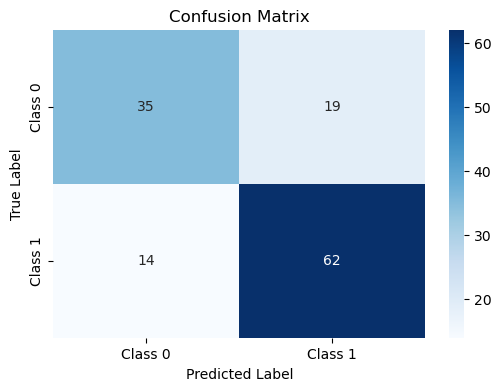

Confusion Matrix:
[[35 19]
 [14 62]]


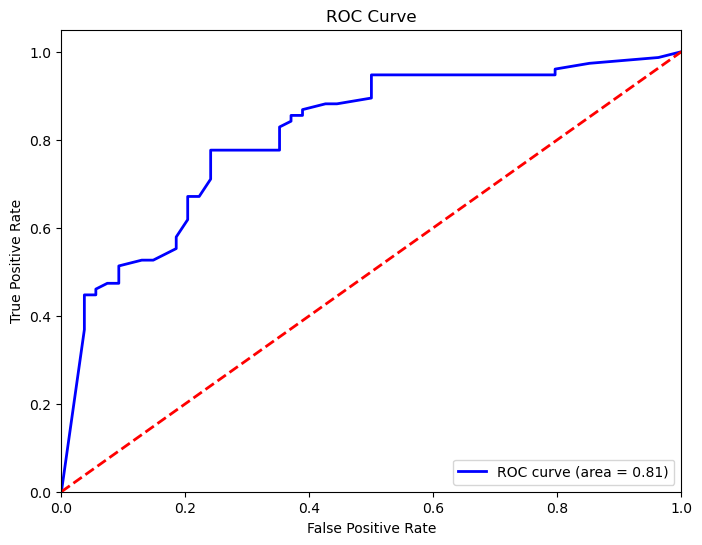

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,classification_report,confusion_matrix
from  matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

models = [
    ("Logistic Regression",LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting",GradientBoostingClassifier()),
    ("XGBoost",XGBClassifier())
]

best_rf_model = None #variable to store random forest pipeline

for name, model in models:
    pipeline = Pipeline([("preprocessor",preprocessor),
                         ("model",model)])
    param_distributions = {}
    if name == "Logistic Regression":
        param_distributions = {
            "model__C":[0.01,0.1,1,10],
            "model__penalty":["l1","l2"],
            "model__solver":["liblinear"]
        }
    elif name == "Random Forest":
          param_distributions = {"model__n_estimators":[100,200],
            "model__max_depth":[None, 10,20]
        }
    elif name =="Gradient Boosting":
        param_distributions = {
            "model__n_estimators":[100,200],
            "model__learning_rate":[0.01,0.1],
            "model__max_depth":[3,4,5]
        }
    elif name =="XGBoost":
        param_distributions = {
            "model__max_depth":[3,4,5],
            "model__learning_rate":[0.01,0.1]
        }
    randomized_search = RandomizedSearchCV(
        pipeline,
        param_distributions,
        # n_iter= 20,
        cv=3,
        scoring="roc_auc",
        verbose=3,
        n_jobs=3
    )
    randomized_search.fit(X_wo_train,y_wo_train)
    best_model = randomized_search.best_estimator_
    y_wo_pred = best_model.predict(X_wo_val)
    if name == "Random Forest":
        best_rf_model = best_model
    print("Model:",name)
    print("Best parameters:",randomized_search.best_params_)
    print("Accuracy:",accuracy_score(y_wo_val,y_wo_pred))
    print("Classification report:\n",classification_report(y_wo_val,y_wo_pred))
    cm = confusion_matrix(y_wo_val, y_wo_pred)
    labels = ['Class 0', 'Class 1']
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()
    print("Confusion Matrix:")
    print(cm)
    if hasattr(best_model.named_steps["model"], "predict_proba"):
        y_wo_pred_proba = best_model.predict_proba(X_wo_val)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_wo_val, y_wo_pred_proba)
        roc_auc = roc_auc_score(y_wo_val, y_wo_pred_proba)

        plt.figure(figsize=(8, 6))
        plt.plot(
            fpr, tpr, color="blue", lw=2, label="ROC curve (area = %0.2f)" % roc_auc
        )
        plt.plot([0, 1], [0, 1], color="red", lw=2, linestyle="--")
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve")
        plt.legend(loc="lower right")
        plt.show()


In [59]:
#sensitivity analysis with SHAP values
import shap

#Extract the fitted model and preprocessor
rf = best_rf_model.named_steps["model"]
pre = best_rf_model.named_steps["preprocessor"]

#Transform X_val using fitted preprocessor
X_val_transformed = pre.transform(X_val)

#Get correct feature names from fitted preprocessor
feature_names = pre.get_feature_names_out()

#Create SHAP explainer on model
explainer = shap.TreeExplainer(rf)

#Compute SHAP values
shap_values = explainer.shap_values(X_val_transformed)

#Use shap_values[1] only if it's a list (i.e., for classification)
if isinstance(shap_values, list):
    shap_values = shap_values[1]

#Plot summary
shap.summary_plot(shap_values, X_val_transformed, feature_names=feature_names)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

SHAP shape: (84, 12, 2)
Transformed X shape: (84, 12)
Feature names length: 12


<Figure size 640x480 with 0 Axes>

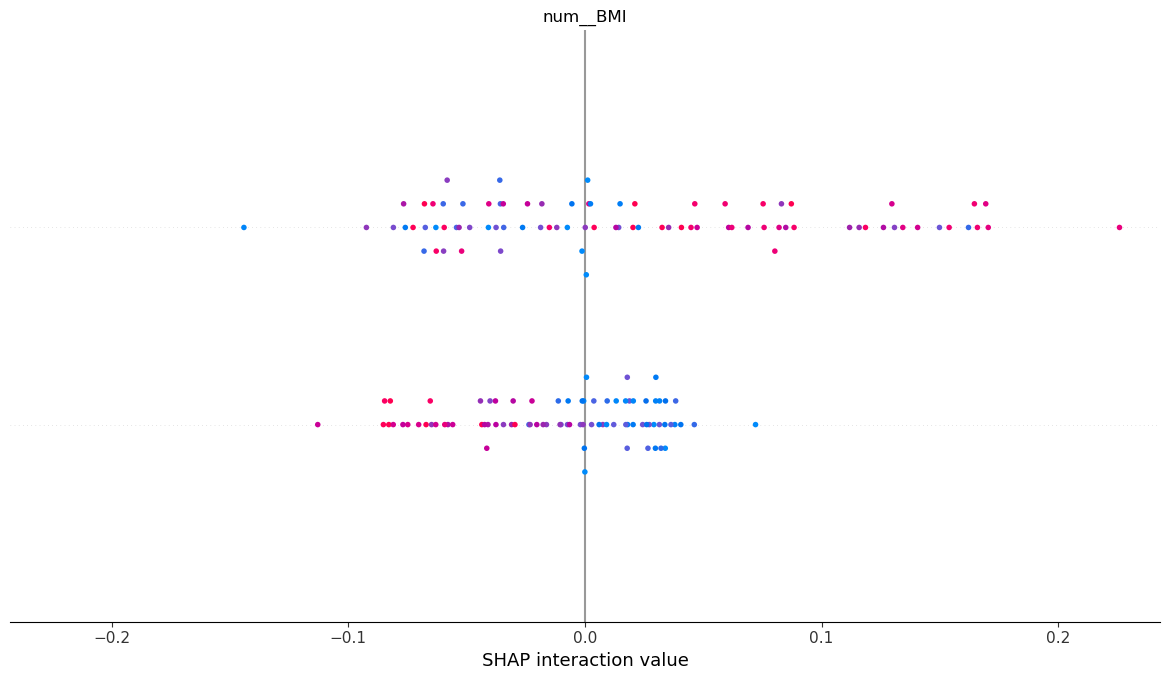

In [60]:
import shap
import numpy as np

# Extract preprocessor and ensure it's fitted
pre = best_rf_model.named_steps["preprocessor"]
pre.fit(X_train)

# Transform X_val with only the fitted preprocessor
X_val_transformed = pre.transform(X_val)

# Get proper feature names
feature_names = pre.get_feature_names_out()

# SHAP explainer and value computation
rf_model = best_rf_model.named_steps["model"]
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_val_transformed)

# Use shap_values[1] if it's a classifier
if isinstance(shap_values, list):
    shap_values = shap_values[1]

# Sanity check
print("SHAP shape:", shap_values.shape)
print("Transformed X shape:", X_val_transformed.shape)
print("Feature names length:", len(feature_names))

# Plot
shap.summary_plot(shap_values, X_val_transformed, feature_names=feature_names)

In [61]:
print(type(X_val_transformed))
print(X_val_transformed[:5])

<class 'numpy.ndarray'>
[[-0.31461508 -0.27727545  1.08289756  0.90227809 -0.98225266  0.
   1.          0.          0.          1.          0.          1.        ]
 [-2.25895013 -1.04420188  0.20918857  1.37102092  0.15009634  1.
   0.          0.          0.          1.          0.          1.        ]
 [ 0.39810897 -0.43517207  1.46427847  3.10333139  1.17950453  0.
   1.          1.          0.          1.          0.          1.        ]
 [ 1.52534616  0.28664104 -0.26233692 -0.17786844 -0.46754857  0.
   0.          0.          0.          1.          0.          0.        ]
 [-1.95632832 -0.67878399  0.99275298  1.28950043  1.17950453  0.
   1.          0.          0.          1.          0.          0.        ]]


In [62]:
all_cols = set(X_val.columns)
used_cols = set(num_feature + cat_feature)

missing_cols = all_cols - used_cols
print("Missing columns in preprocessing:", missing_cols)

Missing columns in preprocessing: {'Ketones_in_Urine', 'Ipsilateral_Rebound_Tenderness'}


In [63]:
print(pre.get_feature_names_out())

['num__Age' 'num__BMI' 'num__Neutrophil_Percentage' 'num__WBC_Count'
 'num__Body_Temperature' 'cat__Sex_1' 'cat__Neutrophilia_1'
 'cat__Peritonitis_1' 'cat__Peritonitis_2' 'cat__Lower_Right_Abd_Pain_1'
 'cat__Contralateral_Rebound_Tenderness_1' 'cat__Loss_of_Appetite_1']


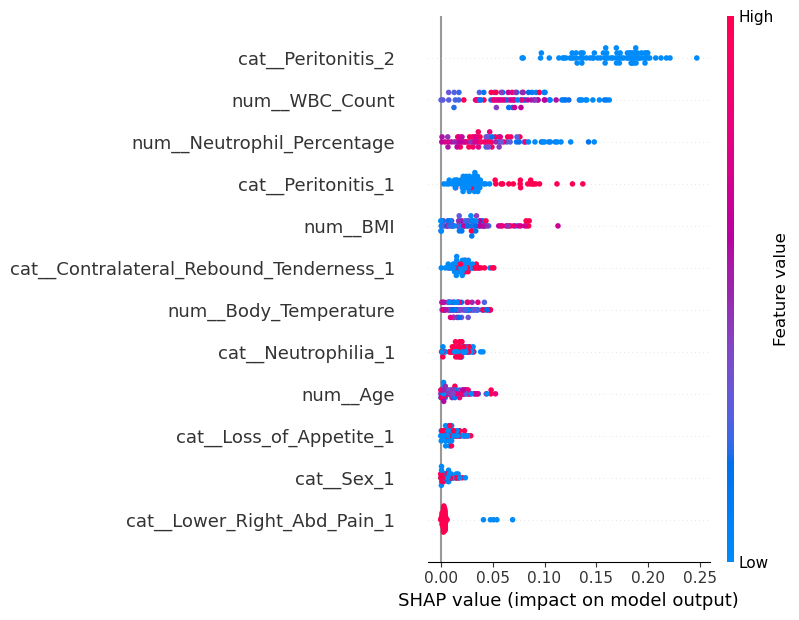

In [64]:
# Convert list of class-wise SHAP arrays into mean absolute values
import numpy as np

shap_values_mean = np.mean(np.abs(shap_values), axis=2)  # shape (84, 12)

# Plot summary using mean SHAP values
shap.summary_plot(shap_values_mean, X_val_transformed, feature_names=feature_names)